# 2024/DSC/0056/SS

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # importing python libraries
import seaborn as sns          

# (a) What is a ’typical’ yearly income for these 4,365 people? (3 marks)
Typical income is usually represented by mean because it is resistant to outliers
but am calculating for both mean and meadian.

In [35]:
typical_yearly_income = pd.read_excel('Wages 2020Census cleaned.xlsx')
print(typical_yearly_income)

      Age     Sex           Marital_status  Number_of_children  Family_size  \
0      30    Male  Married, spouse present                   2            4   
1      28  Female  Married, spouse present     1 child present            3   
2      34    Male  Married, spouse present     1 child present            3   
3      58  Female   Married, spouse absent     1 child present            2   
4      39    Male     Never married/single  0 children present            1   
...   ...     ...                      ...                 ...          ...   
4360   67    Male  Married, spouse present  0 children present            2   
4361   48    Male  Married, spouse present                   4            6   
4362   33    Male   Married, spouse absent  0 children present            1   
4363   22  Female     Never married/single  0 children present            2   
4364   49  Female  Married, spouse present                   2            4   

                    Education-degree_recode  \
0   

In [36]:
typical_income_mean = typical_yearly_income['Income-wages'].mean() #finding the mean of yearly income
print(typical_income_mean)

58704.16494845361


In [37]:
typical_income_median = typical_yearly_income['Income-wages'].median() #finding the mean of yearly income
print(typical_income_median)

41000.0


# b.To know whether the yearly income varies i will have to calculate their standard deviation

In [38]:
typical_income_std = typical_yearly_income['Income-wages'].std() #finding the standard devition and there is variation because the standard deviation is not zero.
print(typical_income_std)   #the values of yearly income are not the same


68338.0614351565


In [39]:
income_std = typical_yearly_income['Income-wages'].std()
income_var = typical_yearly_income['Income-wages'].var() #the yearly income vary significantly as indicated by standard deviation value
print(income_std)                                        #a large varience  confirms a noticeable variability
print(income_var)

68338.0614351565
4670090640.715224


# c. What would the values of the standard deviation and IQR be if there was no variability inyearly income for these 4,365 people? (5 marks)

If there is no varaibility in yearly income the standard deviation will be zero and inter-quatile range will be zero.
When the standard deviation is zero , it means there is no variation in the yearly income and every value is identical.
The IQR is the rage of the middle half of a distribution. If there is no variability the IQR is zero.
Variability describes how far apart data points are from each other and from the center of a distribution. When all income-wage values are the same there is zero variabilty and the graph of the distribution will have  a zero width. 

# d.What would the values of the mean, median, Q1, Q3, minimum and maximum yearly incomes be if there was no variability?

# (e) What do you think are some possible causes or reasons or potential sources of the variability inthe yearly incomes of these 4,365 people? (Hint: Perform bivariate analysis leveraging boxplotsbetween response variable and education level, region of the US. Provide an explanation of yourthinking with numerical support) (5 marks)

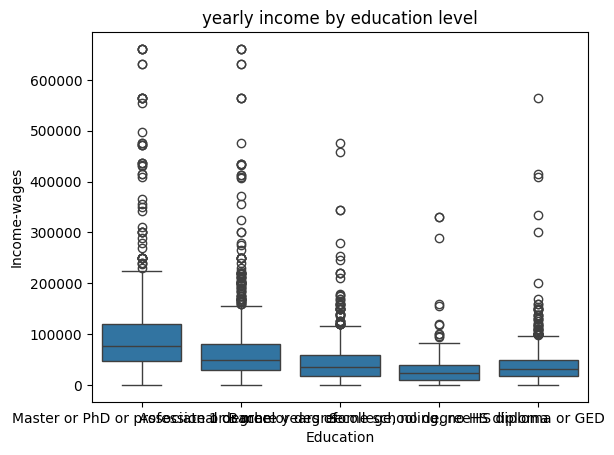

In [41]:
#Box plot of income-wages by education level
sns.boxplot(data = typical_yearly_income , x= 'Education', y = 'Income-wages')
plt.title('Income-wage by education level')
plt.show()
            

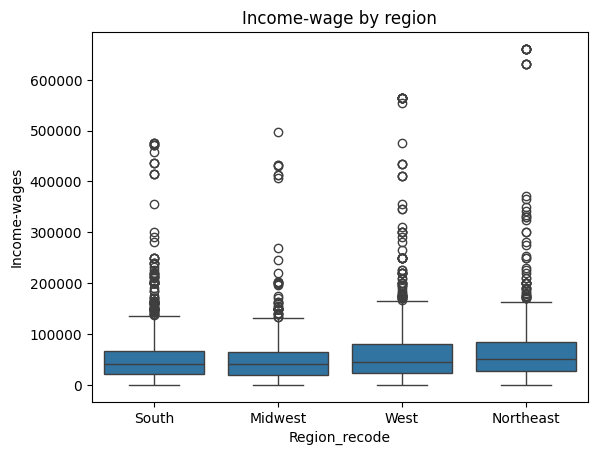

In [43]:
#Boxplot of income-wages by region
sns.boxplot(data = typical_yearly_income, x = 'Region_recode',y = 'Income-wages')
plt.title('Income-wage by region')
plt.show()

# 2. Exploratory Data Analysis

# (a) For each gender, which major has the highest total study hours per week? (2 marks)

In [45]:
student_data = pd.read_csv('student_performance_data.csv')

In [46]:
student_data

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No
...,...,...,...,...,...,...,...,...,...
495,496,Male,22,37,76.61,2.97,Science,No,No
496,497,Male,23,11,56.29,3.20,Science,No,No
497,498,Female,20,6,56.64,3.20,Science,No,Yes
498,499,Male,22,18,57.18,2.05,Business,No,Yes


In [49]:
grouped_data = student_data.groupby(['Gender','Major'])['StudyHoursPerWeek'].sum() # grouping data by gender and major and suming the study hours per week
result = grouped_data.groupby('Gender').idxmax()  # identifying the major wwith the highest study hours for each gender
print(result)

Gender
Female    (Female, Business)
Male       (Male, Education)
Name: StudyHoursPerWeek, dtype: object


# (b) Which gender has the highest overall average attendance rate? Return the gender and the averageattendance rate? (3 marks)


In [51]:
# group the data by gender
average_attendance = student_data.groupby('Gender')['AttendanceRate'].mean() # calculating the mean attendance for each gender
max_gender = average_attendance.idxmax()     # calculating gender which has the highest average attendance rate
max_value = average_attendance.max()
print(max_gender,max_value)

Female 75.9257421875


# (c) What percentage of students have part-time jobs, and what percentage have no part-time jobs? (5 marks)

In [52]:
# count the number of students with and without part time jobs
student_total = len(student_data)
part_time_counts = student_data['PartTimeJob'].value_counts() #calculating percentage based on total number of students.
part_time_percentage = (part_time_counts/student_total)*100
print(part_time_percentage)

PartTimeJob
Yes    53.6
No     46.4
Name: count, dtype: float64


# (d) For each gender, what is the mean GPA and variance of age? (5 marks)

In [59]:
# group the data by gender
mean_and_variance = student_data.groupby('Gender').agg(
    mean_gpa = ('GPA','mean'),
    age_varience = ('Age','var'))
print(mean_and_variance)

        mean_gpa  age_varience
Gender                        
Female  2.995352      4.005637
Male    2.974467      3.960130


# (e) Create a visualization that effectively shows if there is a relationship between any two variablesof your choice. Your answer must be given in a single pipe. (5 marks)

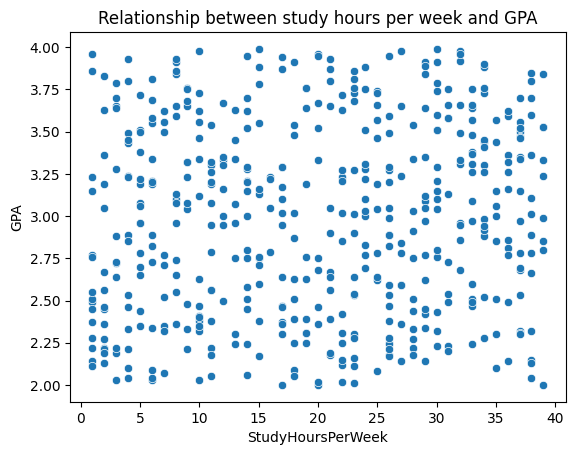

In [64]:
sns.scatterplot(data = student_data, x= 'StudyHoursPerWeek', y='GPA')
plt.title('Relationship between study hours per week and GPA')
plt.show()

# 3. Linear regression

# (a) Briefly describe the steps involved in fitting a linear regression in Python? (2 marks)


# (b) What assumptions does the linear regression take into consideration? (3 marks)


# (c) Using the 2020 US Census dataset, train a simple linear regression predicting a continuous target variable using the scikit-learn library. From the output coefficients, generate an equation representing the trained simple linear regression? (3 amrks)

In [65]:
typical_yearly_income = pd.read_excel('Wages 2020Census cleaned.xlsx')
print(typical_yearly_income)

      Age     Sex           Marital_status  Number_of_children  Family_size  \
0      30    Male  Married, spouse present                   2            4   
1      28  Female  Married, spouse present     1 child present            3   
2      34    Male  Married, spouse present     1 child present            3   
3      58  Female   Married, spouse absent     1 child present            2   
4      39    Male     Never married/single  0 children present            1   
...   ...     ...                      ...                 ...          ...   
4360   67    Male  Married, spouse present  0 children present            2   
4361   48    Male  Married, spouse present                   4            6   
4362   33    Male   Married, spouse absent  0 children present            1   
4363   22  Female     Never married/single  0 children present            2   
4364   49  Female  Married, spouse present                   2            4   

                    Education-degree_recode  \
0   

In [66]:
from sklearn.linear_model import LinearRegression    #importing libraries
from sklearn.model_selection import train_test_split
X = typical_yearly_income['Education'] # independent variable
y = typical_yearly_income['Income-wages'] #dependent variable
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
#train the linear regression model
model = LinearRegression
model.fit(X_train,y_train)
#extract coefficients
intercept = model.intercept_
slope = model.coef_[0]

ModuleNotFoundError: No module named 'sklearn'

# (d) Compute the Mean Absolute Error (MSE) from your model. (2 marks)


In [ ]:
from sklearn.metrices import mean_absolute_error
y_prediction = model.predict(X_test)
mae = mean_absolute_error(y_test, y_prediction)
print(mae)

# (e) Extract and interprete the key outputs from a linear regression model (5 marks)

In [ ]:
from sklearn.metrics import r2_score
#calculating r2 score
r2 = r2_score(y_test,y_prediction)
print(intercept)
print(slope)
print(r2)

# (f) Plot the linear regression model (5 marks

In [ ]:
#scatterplot of actual data
plt.scatterplot(X_test, y_test, color='blue',label='Actual Data')
#regression line
plt,plot(X_test, y_prediction,color = 'red',label = 'Regression Line')
plt.title('Linear Regression Model')
plt.xlabel('Education')
plt.ylabel('Income-wages')
plt.legend()
plt.show()

# 4. Bonus Question.

# (a) Multiply a 5x3 matrix by a 3x2 matrix (real matrix product) (Hint: create a 5x3 and 3x2 matrices and peform matrix multiplication).

In [67]:
from numpy import random

In [71]:
matrix_A = np.random.rand(5,3)
matrix_B = np.random.rand(3,2)
product = np.dot(matrix_A,matrix_B)
print(product)

[[0.42947495 0.97685275]
 [0.41526899 0.83062263]
 [0.76058496 1.77987252]
 [0.28775399 0.60981895]
 [0.26105512 0.6439099 ]]


# (b) Create a 3x3 identity matrix

In [72]:
identity_matrix = np.eye(3)
print(identity_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# (c) Create a vector with values ranging from 10 to 49).

In [73]:
vector = np.arange(10,50)
print(vector)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


# (d) Create a null vector of size 10.

In [74]:
null_vector = np.zeros(10)
print (null_vector)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# (e) Create a 3x3x3 array with random values


In [76]:
random_array = np.random.rand(3,3,3)
print(random_array)

[[[0.32323882 0.34897406 0.38196717]
  [0.89495575 0.5909845  0.63144172]
  [0.35377115 0.97274223 0.39886518]]

 [[0.91398688 0.32162732 0.63722514]
  [0.59667573 0.79335486 0.13688694]
  [0.5951641  0.36283787 0.87535494]]

 [[0.10379638 0.31659726 0.57872103]
  [0.08281719 0.59204744 0.86848601]
  [0.10795799 0.47227941 0.05863145]]]


# (f) Create a 5x5 matrix with values 1,2,3,4 just below the diagonal

In [77]:
diagonal_matrix = np.diag([1,2,3,4], k=-1)
print (diagonal_matrix)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


# (g) Normalize a 5x5 random matrix

In [78]:
random_matrix = np.random.rand(5,5)
normalised_matrix = (random_matrix -random_matrix.mean())/random_matrix.std()
print(random_matrix)
print(normalised_matrix)

[[0.16278529 0.30678803 0.754738   0.35385337 0.14909948]
 [0.80496801 0.10651362 0.0255433  0.73456247 0.67430986]
 [0.79038548 0.90889869 0.07135791 0.06240597 0.10487173]
 [0.17835555 0.23368909 0.61552999 0.57997021 0.33168465]
 [0.5847575  0.02514586 0.0202471  0.6993624  0.00194578]]
[[-0.69334309 -0.21444497  1.27526555 -0.05792365 -0.73885687]
 [ 1.44231138 -0.88048117 -1.14975755  1.20816945  1.00779227]
 [ 1.39381546  1.78794514 -0.99739565 -1.0271664  -0.8859415 ]
 [-0.64156237 -0.45754414  0.81231287  0.69405462 -0.13164834]
 [ 0.70997533 -1.15107928 -1.16737069  1.09110747 -1.22823387]]


# (h) How to get the dates of yesterday, today and tomorrow?

In [79]:
from datetime import datetime, timedelta


In [81]:
#todays date
today = datetime.today().date()
#yesterday's date
yesterday = today - timedelta(days=1)
#tomorrow's date
tomorrow = today + timedelta(days=1)
print(today)
print(tomorrow)
print(yesterday)

2024-12-12
2024-12-13
2024-12-11


# (i) Find indices of non-zero elements from [1,2,0,0,4,0]. In all the above questions explain your approach

In [83]:
array = np.array([1,2,0,0,4,0])
non_zero = np.nonzero(array)
print(non_zero[0])

[0 1 4]
